In [7]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

local_path = '/Users/frank/PGM/Score-matching-project-'
sys.path.append(local_path)

%load_ext autoreload
%autoreload 2

import dataset
from dataset.sampling import Discrete
from dataset import sampling, densities, scores, visualisation
import score_matching
from score_matching import toy_models, learning_objectives, score_visualisation

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# GMM

In [8]:
# Parameters
N = 10000
mus = [np.array([0, 0]), np.array([10,10])]
sigmas = [np.eye(2), np.eye(2)]
alphas = [0.5, 0.5]

In [9]:
gmm_data, clusters = sampling.gaussian_mixture_sampling(mus, sigmas, alphas, N)

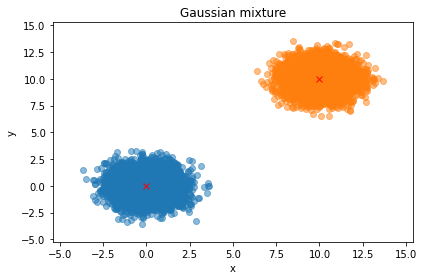

In [10]:
visualisation.plot_GMM(gmm_data, clusters, mus, sigmas, alphas)

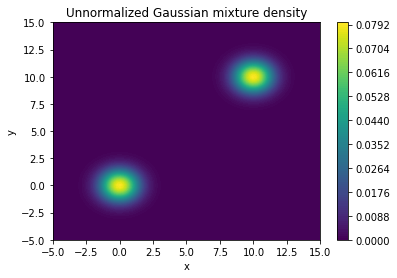

In [11]:
visualisation.gmm_density_heatmap(densities.gmm_density, mus, sigmas, alphas)

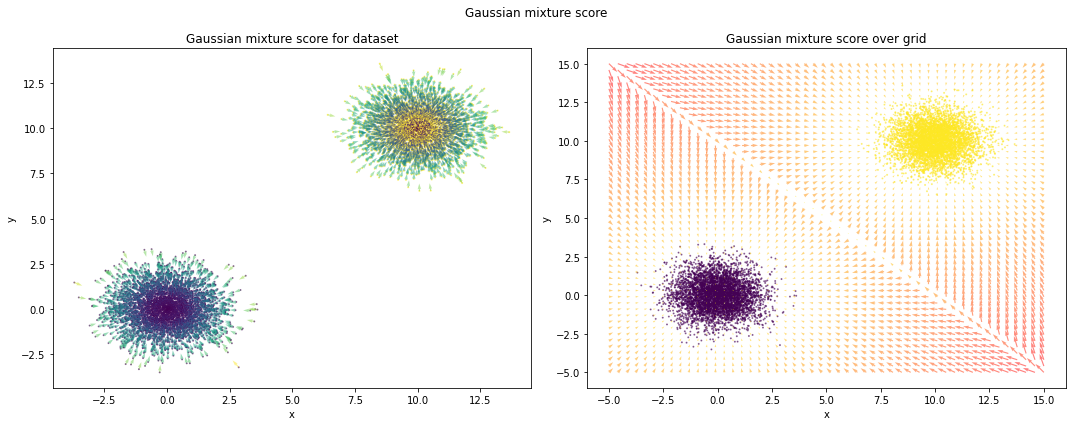

In [12]:
visualisation.gmm_score_plot(data=gmm_data, clusters=clusters, mus=mus, sigmas=sigmas, alphas=alphas)

# Banana-shaped data

In [13]:
# Parameters
N = 10000
mu_banana = np.array([0, 0])
sigma_banana = np.eye(2)

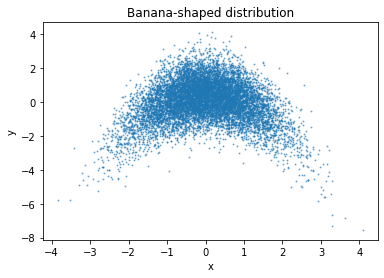

In [14]:
banana_data = sampling.banana_shaped_sampling(N, mu_banana, sigma_banana)

visualisation.plot_banana(banana_data)

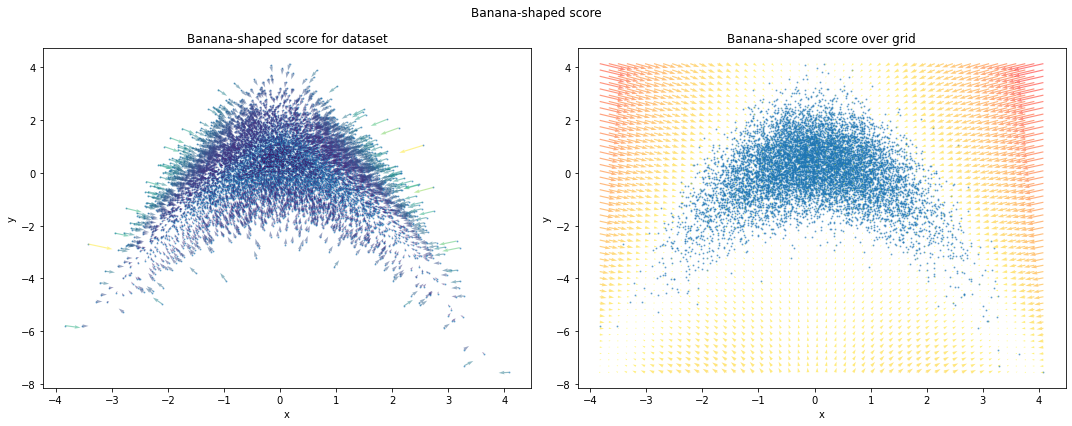

In [15]:
visualisation.banana_score_plot(banana_data)

# Discrete Gaussian Star distribution

In [22]:
sampler = Discrete(center_star=[0,0], size_star = 1, m_start = 250, scale=0.01)
samples, clusters = sampler.sample_with_clusters(20000)

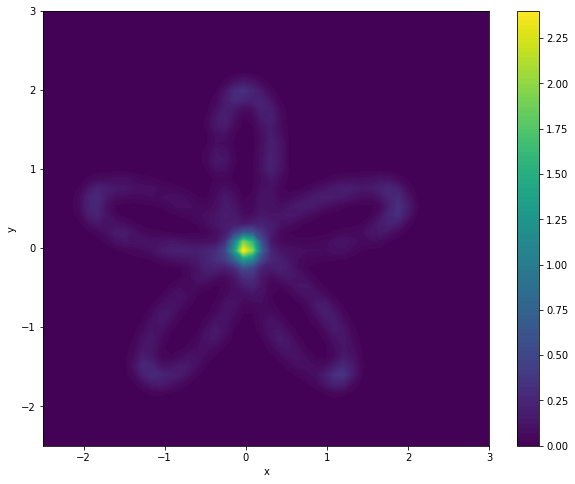

In [24]:
sampler.gmm_density_heatmap()

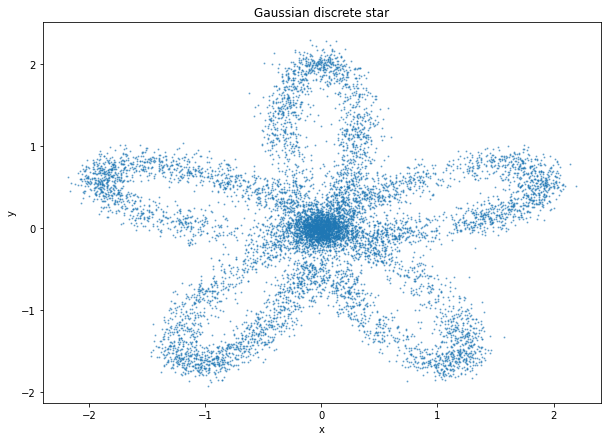

In [18]:

sampler.plot_simple(samples)


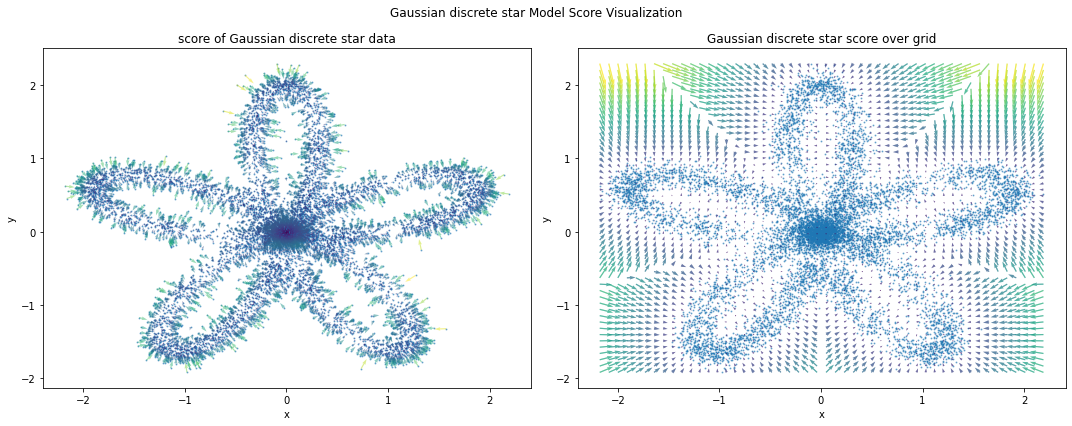

In [19]:
sampler.plot_star_scores(samples)